In [48]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime


In [49]:
import requests as re
import re # for regex
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
from transformers import BertTokenizer, BertForSequenceClassification
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence


[nltk_data] Downloading package wordnet to /home/andsilva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
now = datetime.now()
 
print("date..............:", now)

date..............: 2023-05-19 21:05:11.009424


In [52]:
#### https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
df_reviews = pd.read_csv('../dataset/Reviews.csv') # full dataset
#df_reviews = pd.read_csv('../dataset/out.csv') # small part of the dataset

# dataset size:
print(f'Numero de linha: {df_reviews.shape[0]}, numero de colunas: {df_reviews.shape[1]}') 

Numero de linha: 568454, numero de colunas: 10


In [53]:
######## parte do dataset
df_reviews_small = df_reviews.copy()
df_reviews = df_reviews_small.sample(1000) # FIXME remover no final

In [54]:
# Lista valores faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [55]:
# dataset - tamanho
df_reviews.shape

(1000, 10)

In [56]:
# retirar linha com valores faltantes
df_reviews = df_reviews.dropna()

In [57]:
# checar numero de linha faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [58]:
df_reviews.shape

(1000, 10)

In [59]:
# retirar os neutros.
df_reviews = df_reviews[df_reviews['Score'] != 3]

In [60]:
df_reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
433736,433737,B001LQCOIS,A1HVYJ9PB3AJ64,H. Linnell,16,38,1,1261180800,Save yourself some money,"Use a saucepan -- cut up the fruit, add a bit ..."
523345,523346,B000L6TT5A,A292KQT8P22D72,"Linda J. Manson ""Sammy Stringbeads""",3,3,5,1197158400,Wonderful Holiday Flavoring!,The Stirling Gourmet Gingerbread Coffee Flavor...
484510,484511,B000OSJJ1E,A3OHKU3CMIZSPR,"Janet T. Underwood ""Janet""",1,1,2,1337644800,Just not as cute as I had hoped,I purchased these sprinkles to decorate a gian...


In [61]:
# lista a quantidade de cada categoria de score.
df_reviews['Score'].value_counts()

5    625
4    144
1     76
2     63
Name: Score, dtype: int64

In [62]:
# redefinir score
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "0"
    #elif label == 3.0:
    #    return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "1"
df_reviews['negative'] = df_reviews["Score"].apply(sentiment)

In [63]:
df_reviews["negative"].value_counts()

0    769
1    139
Name: negative, dtype: int64

In [64]:
#Mude df5 para df3 para pegar toda base
texts = df_reviews['Text'].sum()
texts[0:1000]

'Use a saucepan -- cut up the fruit, add a bit of water, cover. Steam for about 10 min. Use the immersion blender right in the saucepan or in a tall cup. Voila. Baby food! for about $20. I was worried too, but just gave it a shot, and it was a breeze and baby loves his applesauce! If you are doing sweet potato, just bake it for an hour first. It should be nice and soft. And about the same amount of dishes to clean as this thing. Plus it takes up less space.The Stirling Gourmet Gingerbread Coffee Flavoring is just the best during the holidays; gives your coffee, latte, or capuccino a great holiday flavor that you can linger over in the morning. I enjoy my morning cup of coffee more since I have started using the Stirling Flavorings, as they are the best I have tried, and the Gingerbread is so good for the holidays. I have also used it on ice cream; yum!I purchased these sprinkles to decorate a giant cupcake.  They were just as advertised and I received them promptly.  The colors are sof

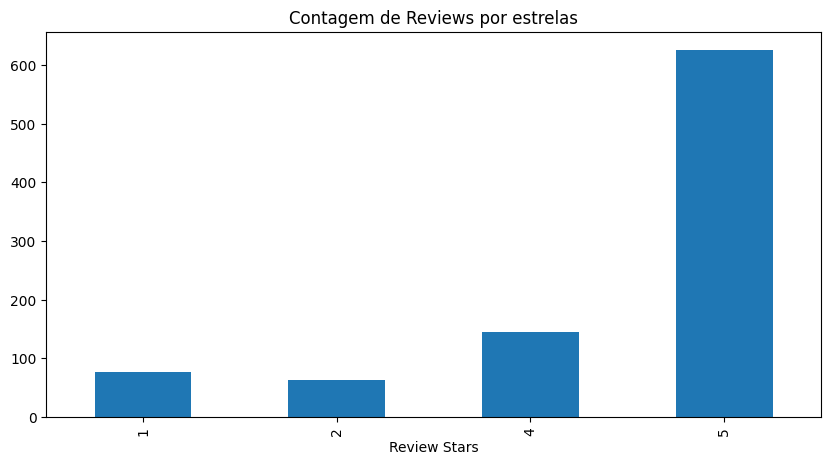

In [65]:
ax = df_reviews['Score'].value_counts().sort_index().plot(kind='bar',
                                                  title='Contagem de Reviews por estrelas',
                                                  figsize=(10, 5)
                                                 )

ax.set_xlabel('Review Stars')
plt.show()

In [66]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords_pa = stop_en + stop_pt
stopwords_pa.extend(['-',''])

In [67]:
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]


In [68]:
# lista de palavras do Text 'reviews'
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords_pa]
freqdist = Counter(list_words)
dict(freqdist.most_common(10))

{'br': 429,
 'like': 412,
 'good': 281,
 'one': 279,
 'taste': 272,
 'coffee': 258,
 'great': 233,
 'tea': 227,
 'food': 221,
 'flavor': 214}

In [69]:
from wordcloud import WordCloud
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

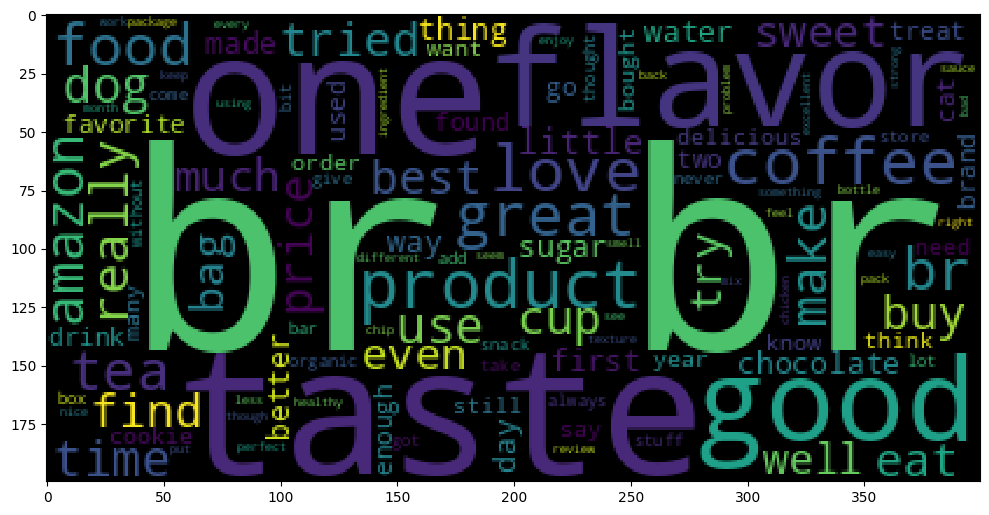

In [70]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

In [71]:
freq_common_works = dict(freqdist.most_common(10))
freq_common_works

{'br': 429,
 'like': 412,
 'good': 281,
 'one': 279,
 'taste': 272,
 'coffee': 258,
 'great': 233,
 'tea': 227,
 'food': 221,
 'flavor': 214}

In [72]:
common_words = list(freq_common_works.keys())
common_words = common_words[0:4]

In [73]:
dispersion_words = common_words
plt.figure(figsize=(16,6))
#nltk_text.dispersion_plot(dispersion_words)

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

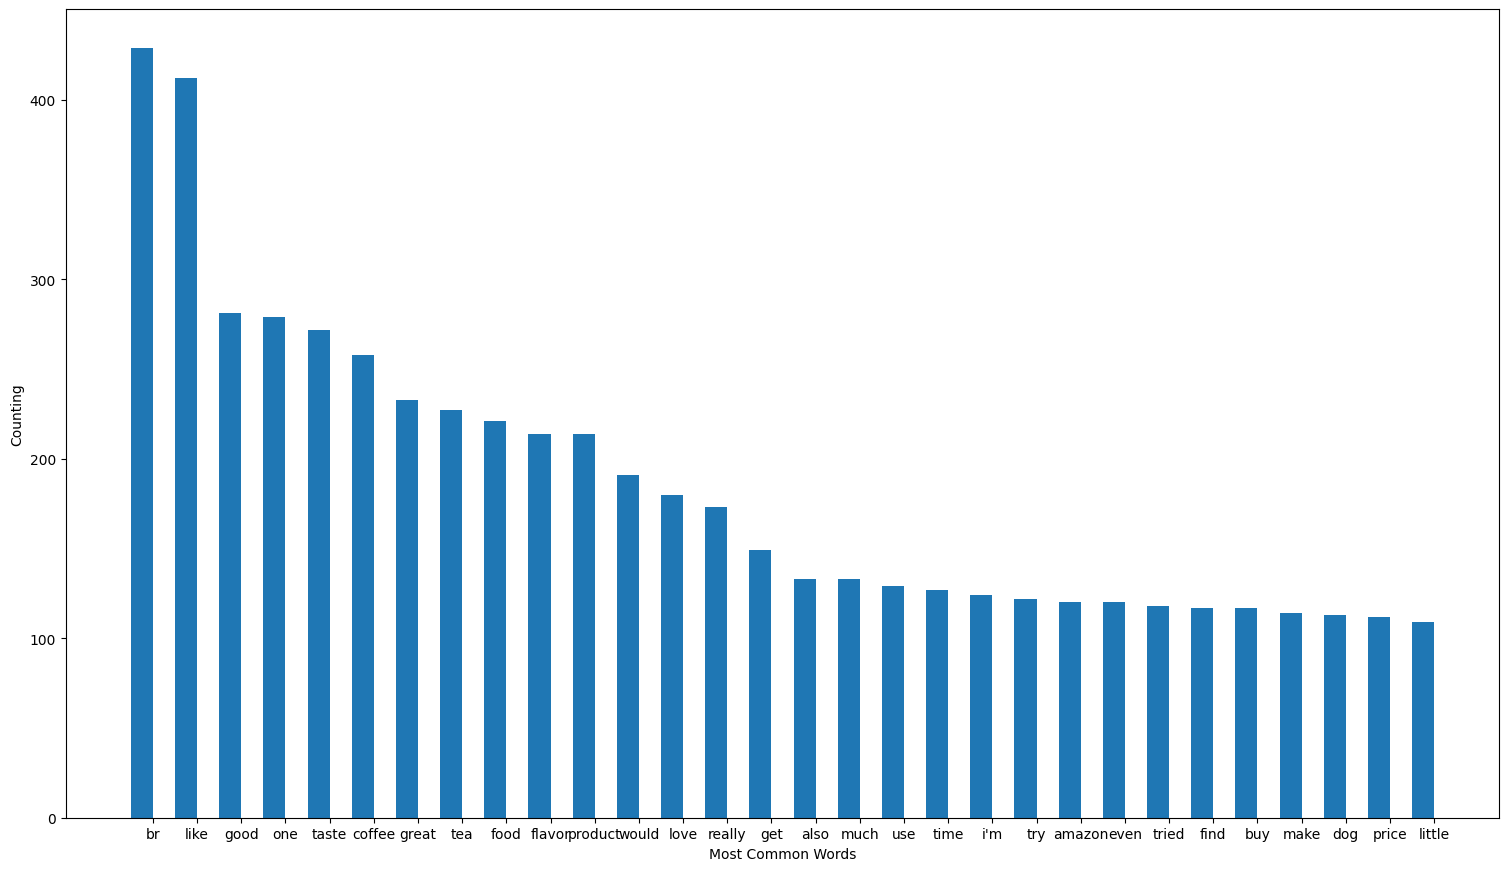

In [74]:
labels, values = zip(*freqdist.most_common(30))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('Most Common Words') 
plt.ylabel('Counting') 
plt.show()

### Data Preparation

In [75]:
# remove tags html
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df_reviews['Text'] = df_reviews['Text'].apply(clean)

In [76]:
# remover caracteres especiais
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df_reviews['Text'] = df_reviews['Text'].apply(is_special)

In [77]:
# Converter - lowercase
def to_lower(text):
    return text.lower()

df_reviews['Text'] = df_reviews['Text'].apply(to_lower)

In [78]:
nltk.download('stopwords')
nltk.download('punkt')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df_reviews['Text'] = df_reviews['Text'].apply(rem_stopwords)
#df_reviews['Text']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [79]:
def stem_txt(text):
    ss = SnowballStemmer('english') #tem portugues também
    return " ".join([ss.stem(w) for w in text])

df_reviews['Text'] = df_reviews['Text'].apply(stem_txt)
#df_reviews['Text']

In [80]:
df_reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'negative'],
      dtype='object')

In [81]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 433736 to 125190
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      908 non-null    int64 
 1   ProductId               908 non-null    object
 2   UserId                  908 non-null    object
 3   ProfileName             908 non-null    object
 4   HelpfulnessNumerator    908 non-null    int64 
 5   HelpfulnessDenominator  908 non-null    int64 
 6   Score                   908 non-null    int64 
 7   Time                    908 non-null    int64 
 8   Summary                 908 non-null    object
 9   Text                    908 non-null    object
 10  negative                908 non-null    object
dtypes: int64(5), object(6)
memory usage: 85.1+ KB


In [82]:
df_reviews['Text']

433736    use saucepan cut fruit add bit water cover ste...
523345    stirl gourmet gingerbread coffe flavor best ho...
484510    purchas sprinkl decor giant cupcak advertis re...
428247    price good believ well shitak superior superma...
194669    purchas item christmasgift husband love cheese...
                                ...                        
555298    usual buy fresh roast bean various onlin store...
15587                        dog resist treat get anyth one
297294    one friend got cerelac littl one son tast plac...
426644    review lamb product label way worth note food ...
125190    cereal go one favorit usual weetabix person pl...
Name: Text, Length: 908, dtype: object

In [83]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [84]:
df_reviews['Text'] = df_reviews['Text'].apply(preprocess_text)
df_reviews['Text']

433736    use saucepan cut fruit add bit water cover ste...
523345    stirl gourmet gingerbread coffe flavor best ho...
484510    purchas sprinkl decor giant cupcak advertis re...
428247    price good believ well shitak superior superma...
194669    purchas item christmasgift husband love cheese...
                                ...                        
555298    usual buy fresh roast bean various onlin store...
15587                        dog resist treat get anyth one
297294    one friend got cerelac littl one son tast plac...
426644    review lamb product label way worth note food ...
125190    cereal go one favorit usual weetabix person pl...
Name: Text, Length: 908, dtype: object

In [85]:
X = df_reviews['Text']
y = df_reviews['negative']

In [86]:
cv = CountVectorizer()
bow = cv.fit_transform(X)
word_freq = dict(zip(cv.get_feature_names_out(), np.asarray(bow.sum(axis=0)).ravel()))
#word_dict = cv.vocabulary_

In [87]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size=0.4, random_state=0)

In [88]:
# Set the parameters
max_features = 5000  # Maximum number of words to keep
max_length = 300  # Maximum length of each review
batch_size = 64
epochs = 10

In [89]:
# Build the model
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [90]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [92]:
# Train the model
#model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation))